In [1]:
import pyspark as ps    # for the pyspark suite
import pandas as pd

In [2]:
spark = (ps.sql.SparkSession
         .builder
         .master('local[*]')
         .appName('lecture')
         .getOrCreate()
        )
sc = spark.sparkContext

In [3]:
spark


In [45]:
df = spark.read.option("inferschema", "true").csv('data/patent.tsv',
                    header=True,       # use headers or not
                    quote='"',         # char for quotes
                    sep="\t")          # char for separation  

# prints the schema
df.printSchema()

# some functions are still valid
#print("line count: {}\n".format(df.count()))
#df = df.limit(100)
# show the table in a oh-so-nice format
#df.show()

root
 |-- id: string (nullable = true)
 |-- type: string (nullable = true)
 |-- number: string (nullable = true)
 |-- country: string (nullable = true)
 |-- date: timestamp (nullable = true)
 |-- abstract: string (nullable = true)
 |-- title: string (nullable = true)
 |-- kind: string (nullable = true)
 |-- num_claims: integer (nullable = true)
 |-- filename: string (nullable = true)
 |-- withdrawn: string (nullable = true)



In [6]:
df.count()

DataFrame[id: string, type: string, number: string, date: timestamp, abstract: string, title: string, kind: string, num_claims: int, filename: string, withdrawn: string]

In [10]:
df = df.drop('country')
df = df.drop('filename')
df = df.drop('number')
df.show()

+--------+-------+-------------------+--------------------+--------------------+----+----------+---------+
|      id|   type|               date|            abstract|               title|kind|num_claims|withdrawn|
+--------+-------+-------------------+--------------------+--------------------+----+----------+---------+
|10000000|utility|2018-06-19 00:00:00|A frequency modul...|Coherent LADAR us...|  B2|        20|     NULL|
|10000001|utility|2018-06-19 00:00:00|The injection mol...|Injection molding...|  B2|        12|     NULL|
|10000002|utility|2018-06-19 00:00:00|The present inven...|Method for manufa...|  B2|         9|     NULL|
|10000003|utility|2018-06-19 00:00:00|The invention rel...|Method for produc...|  B2|        18|     NULL|
|10000004|utility|2018-06-19 00:00:00|The present inven...|Process of obtain...|  B2|         6|     NULL|
|10000005|utility|2018-06-19 00:00:00|A vacuum forming ...|Article vacuum fo...|  B2|         4|     NULL|
|10000006|utility|2018-06-19 00:00:00

In [44]:
from pyspark.sql.functions import year
df.groupby(year("date").alias("year")).count().show()

+----+-----+
|year|count|
+----+-----+
|2018|  100|
+----+-----+



In [20]:
df.select("type").distinct().show(20,False)

+--------------------------------+
|type                            |
+--------------------------------+
|defensive publication           |
|utility                         |
|plant                           |
|reissue                         |
|statutory invention registration|
|TVPP                            |
|design                          |
+--------------------------------+



In [16]:
df.select("id").distinct().show()

7144425

In [6]:
df.count()

7144425

In [26]:
df.groupby(df.withdrawn).count().show()

+---------+-------+
|withdrawn|  count|
+---------+-------+
|        0|6963631|
|        1|   9668|
|     NULL| 171126|
+---------+-------+



In [27]:
df.groupby(df.country).count().show()

+-------+-------+
|country|  count|
+-------+-------+
|     US|7144425|
+-------+-------+



In [28]:
df.groupby(df.kind).count().show()

+----+-------+
|kind|  count|
+----+-------+
|  I5|      3|
|  H1|    273|
|  P2|  12558|
|  B2|3464834|
|   E|   8692|
|  I4|    509|
|  P3|   6052|
|  B1| 620301|
|   A|2391379|
|   S| 209582|
|  E1|  10107|
|   P|   8282|
|  S1| 409868|
|   H|   1982|
|  H2|      3|
+----+-------+



In [33]:
df.groupby(df.type).count().show(99,False)

+--------------------------------+-------+
|type                            |count  |
+--------------------------------+-------+
|defensive publication           |509    |
|utility                         |6476514|
|plant                           |26892  |
|reissue                         |18799  |
|statutory invention registration|2258   |
|TVPP                            |3      |
|design                          |619450 |
+--------------------------------+-------+



In [5]:
#df_panda = pd.DataFrame(df.take(1000), columns=df.columns)

In [9]:
from pyspark.sql.functions import min, max
min_date, max_date = df.select(min("date"), max("date")).first()
min_date, max_date


(datetime.datetime(1976, 1, 6, 0, 0), datetime.datetime(2019, 10, 8, 0, 0))

In [22]:
df_cpc = spark.read.option("inferschema", "true").csv('data/cpc_current.tsv',
                    header=True,       # use headers or not
                    quote='"',         # char for quotes
                    sep="\t")          # char for separation  

# prints the schema
df_cpc.printSchema()

# some functions are still valid
print("line count: {}\n".format(df_cpc.count()))

# show the table in a oh-so-nice format
df_cpc.show()

root
 |-- uuid: string (nullable = true)
 |-- patent_id: integer (nullable = true)
 |-- section_id: string (nullable = true)
 |-- subsection_id: string (nullable = true)
 |-- group_id: string (nullable = true)
 |-- subgroup_id: string (nullable = true)
 |-- category: string (nullable = true)
 |-- sequence: integer (nullable = true)

line count: 39915464

+--------------------+---------+----------+-------------+--------+--------------+-----------+--------+
|                uuid|patent_id|section_id|subsection_id|group_id|   subgroup_id|   category|sequence|
+--------------------+---------+----------+-------------+--------+--------------+-----------+--------+
|000016xombd5lbk9l...|  7070831|         H|          H01|    H01L|H01L2924/01013| additional|      22|
|000070runw99gxjki...|  7618693|         C|          C09|    C09D|     C09D11/30|inventional|       1|
|00008erwm5297s6wv...|  8488869|         G|          G06|    G06T|G06T2207/10016| additional|      20|
|00008q01v2ziacpr0...|  9

In [24]:
ddf = df.join(df_cpc, df.id == df_cpc.patent_id).drop('id')

In [25]:
ddf.count()

1144

In [27]:
ddf.show()

+-------+-------------------+--------------------+--------------------+----+----------+---------+--------------------+---------+----------+-------------+--------+--------------+-----------+--------+
|   type|               date|            abstract|               title|kind|num_claims|withdrawn|                uuid|patent_id|section_id|subsection_id|group_id|   subgroup_id|   category|sequence|
+-------+-------------------+--------------------+--------------------+----+----------+---------+--------------------+---------+----------+-------------+--------+--------------+-----------+--------+
|utility|2018-06-19 00:00:00|Boron nitride nan...|High kinetic ener...|  B2|        20|     NULL|00j2efp5di8xb7jyc...| 10000036|         F|          F41|    F41H|    F41H5/0471|inventional|       7|
|utility|2018-06-19 00:00:00|A pneumatic tire ...|      Pneumatic tire|  B2|         8|     NULL|01h8whavwsry5jx7t...| 10000092|         B|          B60|    B60C|  B60C2011/039| additional|       6|
|util

In [ ]:
df_cpc.count()

In [9]:
df_cpc.select("patent_id").distinct().count()

6452079

In [10]:
df_cpc.groupby(df_cpc.patent_id).count().show()

+---------+-----+
|patent_id|count|
+---------+-----+
|  6973866|   12|
|  9122810|   16|
|  7510754|   20|
|  9390338|   14|
|  9198479|   27|
|  9791123|    5|
|  5585105|   14|
|  6121532|   22|
|  5122749|    2|
|  4359781|    4|
|  9314865|    6|
|  7817829|    2|
| 10065879|   15|
|  6096781|    7|
|  6262027|   10|
|  7394163|   67|
|  5340740|    5|
| 10275120|    3|
|  7265388|   13|
|  8859658|   18|
+---------+-----+
only showing top 20 rows



In [11]:
df_cpc.filter(df_cpc.patent_id==6121532).sort(df_cpc.sequence.asc()).show()

+--------------------+---------+----------+-------------+--------+------------+-----------+--------+
|                uuid|patent_id|section_id|subsection_id|group_id| subgroup_id|   category|sequence|
+--------------------+---------+----------+-------------+--------+------------+-----------+--------+
|jyxz78olyq2fo58oy...|  6121532|         G|          G10|    G10H|  G10H1/0025|inventional|       0|
|3t723r37m4i1if7xk...|  6121532|         G|          G10|    G10H|    G10H1/00|inventional|       1|
|3bcii7zojwle05qgv...|  6121532|         G|          G10|    G10H|  G10H1/0091|inventional|       2|
|wdqqexk2781exxt0z...|  6121532|         G|          G10|    G10H|    G10H1/02|inventional|       3|
|l3ti0nnva2l56or8y...|  6121532|         G|          G10|    G10H|  G10H1/0575|inventional|       4|
|m7yrepwt46pmoj8su...|  6121532|         G|          G10|    G10H|    G10H1/20|inventional|       5|
|00346vpqo7vtf12ok...|  6121532|         G|          G10|    G10H|    G10H1/28|inventional|

In [8]:
df_cpc_group = spark.read.option("inferschema", "true").csv('data/cpc_group.tsv',
                    header=True,       # use headers or not
                    quote='"',         # char for quotes
                    sep="\t")          # char for separation  

# prints the schema
df_cpc_group.printSchema()

# some functions are still valid
print("line count: {}\n".format(df_cpc_group.count()))

# show the table in a oh-so-nice format
df_cpc_group.show()

root
 |-- id: string (nullable = true)
 |-- title: string (nullable = true)

line count: 671

+----+--------------------+
|  id|               title|
+----+--------------------+
|A01B|SOIL WORKING IN A...|
|A01C|PLANTING; SOWING;...|
|A01D| HARVESTING; MOWING |
|A01F|PROCESSING OF HAR...|
|A01G|HORTICULTURE; CUL...|
|A01H|NEW PLANTS OR PRO...|
|A01J|MANUFACTURE OF DA...|
|A01K|ANIMAL HUSBANDRY;...|
|A01L| SHOEING OF ANIMALS |
|A01M|CATCHING, TRAPPIN...|
|A01N|PRESERVATION OF B...|
|A21B|BAKERS' OVENS; MA...|
|A21C|MACHINES OR EQUIP...|
|A21D|TREATMENT, e.g. P...|
|A22B|        SLAUGHTERING|
|A22C|PROCESSING MEAT, ...|
|A23B|PRESERVING, e.g. ...|
|A23C|DAIRY PRODUCTS, e...|
|A23D|EDIBLE OILS OR FA...|
|A23F|COFFEE; TEA; THEI...|
+----+--------------------+
only showing top 20 rows



In [13]:
df_cpc_subgroup = spark.read.option("inferschema", "true").csv('data/cpc_subgroup.tsv',
                    header=True,       # use headers or not
                    quote='"',         # char for quotes
                    sep="\t")          # char for separation  

# prints the schema
df_cpc_subgroup.printSchema()

# some functions are still valid
print("line count: {}\n".format(df_cpc_subgroup.count()))

# show the table in a oh-so-nice format
df_cpc_subgroup.show()

root
 |-- id: string (nullable = true)
 |-- title: string (nullable = true)

line count: 259863

+---------+--------------------+
|       id|               title|
+---------+--------------------+
| A01B1/00|         Hand tools |
| A01B1/02|Hand tools -Spade...|
|A01B1/022|Hand tools -Spade...|
|A01B1/024|Hand tools -Spade...|
|A01B1/026|Hand tools -Spade...|
|A01B1/028|Hand tools -Spade...|
| A01B1/04|Hand tools -Spade...|
| A01B1/06|Hand tools -Hoes;...|
|A01B1/065|Hand tools -Hoes;...|
| A01B1/08|Hand tools -Hoes;...|
| A01B1/10|Hand tools -Hoes;...|
| A01B1/12|Hand tools -Hoes;...|
| A01B1/14|Hand tools -Hoes;...|
| A01B1/16|Hand tools -Tools...|
|A01B1/165|Hand tools -Tools...|
| A01B1/18|Hand tools -Tools...|
| A01B1/20|Hand tools -Combi...|
| A01B1/22|Hand tools -Attac...|
|A01B1/222|Hand tools -Attac...|
|A01B1/225|Hand tools -Attac...|
+---------+--------------------+
only showing top 20 rows



In [14]:
df_cpc_subsection = spark.read.option("inferschema", "true").csv('data/cpc_subsection.tsv',
                    header=True,       # use headers or not
                    quote='"',         # char for quotes
                    sep="\t")          # char for separation  

# prints the schema
df_cpc_subsection.printSchema()

# some functions are still valid
print("line count: {}\n".format(df_cpc_subsection.count()))

# show the table in a oh-so-nice format
df_cpc_subsection.show()

root
 |-- id: string (nullable = true)
 |-- title: string (nullable = true)

line count: 136

+---+--------------------+
| id|               title|
+---+--------------------+
|A01|AGRICULTURE; FORE...|
|A21|BAKING; EDIBLE DO...|
|A22|BUTCHERING; MEAT ...|
|A23|FOODS OR FOODSTUF...|
|A24|TOBACCO; CIGARS; ...|
|A41|     WEARING APPAREL|
|A42|            HEADWEAR|
|A43|            FOOTWEAR|
|A44|HABERDASHERY; JEW...|
|A45|HAND OR TRAVELLIN...|
|A46|           BRUSHWARE|
|A47|FURNITURE; DOMEST...|
|A61|MEDICAL OR VETERI...|
|A62|LIFE-SAVING; FIRE...|
|A63|SPORTS; GAMES; AM...|
|A99|SUBJECT MATTER NO...|
|B01|PHYSICAL OR CHEMI...|
|B02|CRUSHING, PULVERI...|
|B03|SEPARATION OF SOL...|
|B04|CENTRIFUGAL APPAR...|
+---+--------------------+
only showing top 20 rows



In [9]:
ddf = ddf.join(df_cpc_group.selectExpr("id", "title as group_title"), ddf.group_id == df_cpc_group.id).drop('id')

NameError: name 'ddf' is not defined

In [16]:
ddf = ddf.join(df_cpc_subgroup.selectExpr("id", "title as subgroup_title"), ddf.subgroup_id == df_cpc_subgroup.id).drop('id')

In [17]:
ddf = ddf.join(df_cpc_subsection.selectExpr("id", "title as subsection_title"), ddf.subsection_id == df_cpc_subsection.id).drop('id')

In [18]:
ddf.filter(ddf.patent_id==6121532).sort(ddf.sequence.asc()).select(["title","kind","num_claims","category","sequence","group_title","subgroup_title","subsection_title"]).show(99,False)

+-----------------------------------------------------------+----+----------+-----------+--------+---------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [14]:
ddf.columns

['type',
 'date',
 'abstract',
 'title',
 'kind',
 'num_claims',
 'withdrawn',
 'uuid',
 'patent_id',
 'section_id',
 'subsection_id',
 'group_id',
 'subgroup_id',
 'category',
 'sequence']

In [20]:
df_actions = spark.read.option("inferschema", "true").csv('data/office_actions.csv',
                    header=True,       # use headers or not
                    quote='"',         # char for quotes
                    sep=",")          # char for separation  

# prints the schema
df_actions.printSchema()

# some functions are still valid
print("line count: {}\n".format(df_actions.count()))

# show the table in a oh-so-nice format
df_actions.show()

root
 |-- app_id: integer (nullable = true)
 |-- ifw_number: string (nullable = true)
 |-- document_cd: string (nullable = true)
 |-- mail_dt: timestamp (nullable = true)
 |-- art_unit: string (nullable = true)
 |-- uspc_class: string (nullable = true)
 |-- uspc_subclass: string (nullable = true)
 |-- header_missing: integer (nullable = true)
 |-- fp_missing: integer (nullable = true)
 |-- rejection_fp_mismatch: integer (nullable = true)
 |-- closing_missing: integer (nullable = true)
 |-- rejection_101: integer (nullable = true)
 |-- rejection_102: integer (nullable = true)
 |-- rejection_103: integer (nullable = true)
 |-- rejection_112: integer (nullable = true)
 |-- rejection_dp: integer (nullable = true)
 |-- objection: integer (nullable = true)
 |-- allowed_claims: integer (nullable = true)
 |-- cite102_gt1: integer (nullable = true)
 |-- cite103_gt3: integer (nullable = true)
 |-- cite103_eq1: integer (nullable = true)
 |-- cite103_max: integer (nullable = true)
 |-- signature_t

In [25]:
df_patents_with_actions = df.join(df_actions, df.id == df_actions.app_id).drop('id')

In [27]:
df.show(20)

+--------+-------+--------+-------+-------------------+--------------------+--------------------+----+----------+-------------+---------+
|      id|   type|  number|country|               date|            abstract|               title|kind|num_claims|     filename|withdrawn|
+--------+-------+--------+-------+-------------------+--------------------+--------------------+----+----------+-------------+---------+
|10000000|utility|10000000|     US|2018-06-19 00:00:00|A frequency modul...|Coherent LADAR us...|  B2|        20|ipg180619.xml|     NULL|
|10000001|utility|10000001|     US|2018-06-19 00:00:00|The injection mol...|Injection molding...|  B2|        12|ipg180619.xml|     NULL|
|10000002|utility|10000002|     US|2018-06-19 00:00:00|The present inven...|Method for manufa...|  B2|         9|ipg180619.xml|     NULL|
|10000003|utility|10000003|     US|2018-06-19 00:00:00|The invention rel...|Method for produc...|  B2|        18|ipg180619.xml|     NULL|
|10000004|utility|10000004|     US

In [32]:
df.groupby('type').count().show()

+--------------------+-------+
|                type|  count|
+--------------------+-------+
|defensive publica...|    509|
|             utility|6476514|
|               plant|  26892|
|             reissue|  18799|
|statutory inventi...|   2258|
|                TVPP|      3|
|              design| 619450|
+--------------------+-------+



In [33]:
ddf.groupby('group_id').count().show()

+--------+------+
|group_id| count|
+--------+------+
|    D06M| 25983|
|    C05C|  2511|
|    C12H|   905|
|    A01B| 11305|
|    B60T| 60771|
|    B63B| 36225|
|    C23C|140387|
|    D06G|   113|
|    A63K|   237|
|    B60Y| 12721|
|    E06B| 40053|
|    E03C|  9036|
|    B27H|   106|
|    A24F|  4581|
|    A21C|  4541|
|    G21G|  1197|
|    A46B| 21483|
|    B03C| 13000|
|    C10M|206384|
|    F41C|  5928|
+--------+------+
only showing top 20 rows



In [34]:
ddf.groupby(['date','group_id']).count().show()

+-------------------+--------+-----+
|               date|group_id|count|
+-------------------+--------+-----+
|2012-07-31 00:00:00|    A01F|    9|
|2005-08-30 00:00:00|    A01K|   21|
|2005-01-11 00:00:00|    A01M|   11|
|2018-06-26 00:00:00|    A22B|    2|
|1999-05-25 00:00:00|    A23P|    1|
|2015-10-27 00:00:00|    A43B|   43|
|1986-05-13 00:00:00|    A44B|    7|
|2013-10-15 00:00:00|    A44D|    1|
|2009-01-06 00:00:00|    A47D|    5|
|1993-08-03 00:00:00|    A47F|    9|
|2000-06-27 00:00:00|    A47J|   33|
|1977-02-08 00:00:00|    A47L|   13|
|2000-03-21 00:00:00|    A61H|   35|
|2018-10-09 00:00:00|    A61H|  155|
|2001-02-27 00:00:00|    A61H|   19|
|2005-09-06 00:00:00|    A61H|   66|
|2013-12-31 00:00:00|    A61K| 1312|
|2017-12-26 00:00:00|    A61K| 1579|
|2001-06-12 00:00:00|    A61L|   91|
|2015-02-17 00:00:00|    A63F|  157|
+-------------------+--------+-----+
only showing top 20 rows



In [36]:
ddf.groupby(['date','group_id']).count().sort(ddf.date.desc()).show(200)

+-------------------+--------+-----+
|               date|group_id|count|
+-------------------+--------+-----+
|2019-09-24 00:00:00|    H05G|    7|
|2019-09-24 00:00:00|    G02F|  185|
|2019-09-24 00:00:00|    F02B|   43|
|2019-09-24 00:00:00|    F28F|   63|
|2019-09-24 00:00:00|    E05D|   32|
|2019-09-24 00:00:00|    B07B|    4|
|2019-09-24 00:00:00|    H02G|   33|
|2019-09-24 00:00:00|    B01F|   55|
|2019-09-24 00:00:00|    B21B|    9|
|2019-09-24 00:00:00|    E06C|    7|
|2019-09-24 00:00:00|    A61Q|   23|
|2019-09-24 00:00:00|    B61L|   16|
|2019-09-24 00:00:00|    F25J|    9|
|2019-09-24 00:00:00|    F16K|   70|
|2019-09-24 00:00:00|    B22C|   10|
|2019-09-24 00:00:00|    H04W| 1425|
|2019-09-24 00:00:00|    B81C|   11|
|2019-09-24 00:00:00|    H01C|    4|
|2019-09-24 00:00:00|    F42C|    2|
|2019-09-24 00:00:00|    B27G|    1|
|2019-09-24 00:00:00|    C12Q|  212|
|2019-09-24 00:00:00|    F24S|   14|
|2019-09-24 00:00:00|    A47F|   20|
|2019-09-24 00:00:00|    F05D|  223|
|

In [40]:
from pyspark.sql.types import StringType
from pyspark.sql.functions import udf

udf1 = udf(lambda x:x[1:-1],StringType())
ddf.withColumn('group_id_tag',udf1('group_id')).show()

+-------+--------+-------+-------------------+--------------------+--------------------+----+----------+--------------------+---------+--------------------+---------+----------+-------------+--------+-----------+-----------+--------+--------------------+--------------------+--------------------+------------+
|   type|  number|country|               date|            abstract|               title|kind|num_claims|            filename|withdrawn|                uuid|patent_id|section_id|subsection_id|group_id|subgroup_id|   category|sequence|         group_title|      subgroup_title|    subsection_title|group_id_tag|
+-------+--------+-------+-------------------+--------------------+--------------------+----+----------+--------------------+---------+--------------------+---------+----------+-------------+--------+-----------+-----------+--------+--------------------+--------------------+--------------------+------------+
|utility|10257972|     US|2019-04-16 00:00:00|An agricultural t...|Fle

In [41]:
ddf.groupby('kind').count().show(40)

+----+--------+
|kind|   count|
+----+--------+
|  I5|      12|
|  B2|25352109|
|   E|     150|
|  B1| 3479343|
|   A|10834269|
|   S|      46|
|   P|       5|
+----+--------+



In [15]:
from pyspark.sql.functions import substring
ddf = ddf.withColumn("group_id_first", ddf.group_id.substr(0,1)).show(5)

+-------+-------------------+--------------------+--------------------+----+----------+---------+--------------------+---------+----------+-------------+--------+-------------+-----------+--------+--------------+
|   type|               date|            abstract|               title|kind|num_claims|withdrawn|                uuid|patent_id|section_id|subsection_id|group_id|  subgroup_id|   category|sequence|group_id_first|
+-------+-------------------+--------------------+--------------------+----+----------+---------+--------------------+---------+----------+-------------+--------+-------------+-----------+--------+--------------+
|utility|2018-06-19 00:00:00|Boron nitride nan...|High kinetic ener...|  B2|        20|     NULL|00j2efp5di8xb7jyc...| 10000036|         F|          F41|    F41H|   F41H5/0471|inventional|       7|             F|
|utility|2018-06-19 00:00:00|A pneumatic tire ...|      Pneumatic tire|  B2|         8|     NULL|01h8whavwsry5jx7t...| 10000092|         B|         

In [16]:
ddf.show(5)

AttributeError: 'NoneType' object has no attribute 'show'

In [56]:
#ddf_limit = df.sort('id', ascending=False).limit(1000)
from pyspark.sql.functions import rand

ddf_limit = ddf.orderBy(rand()).limit(100)

In [57]:
ddf_limit.show()

+-------+--------+-------+-------------------+--------------------+--------------------+----+----------+--------------------+---------+--------------------+---------+----------+-------------+--------+-------------+-----------+--------+--------------------+--------------------+--------------------+
|   type|  number|country|               date|            abstract|               title|kind|num_claims|            filename|withdrawn|                uuid|patent_id|section_id|subsection_id|group_id|  subgroup_id|   category|sequence|         group_title|      subgroup_title|    subsection_title|
+-------+--------+-------+-------------------+--------------------+--------------------+----+----------+--------------------+---------+--------------------+---------+----------+-------------+--------+-------------+-----------+--------+--------------------+--------------------+--------------------+
|utility| 6307107|     US|2001-10-23 00:00:00| A process for hy...|Hydroformylation ...|   A|        10

In [64]:
ddf_limit.withColumn("group_id_first", ddf_limit.group_id.substr(0,1)).groupby(['date','group_id_first']).count().show()

+-------------------+--------------+-----+
|               date|group_id_first|count|
+-------------------+--------------+-----+
|2018-07-24 00:00:00|             C|    1|
|2010-08-17 00:00:00|             A|    1|
|2015-08-25 00:00:00|             G|    1|
|2014-09-30 00:00:00|             C|    1|
|1988-01-19 00:00:00|             H|    1|
|2010-07-06 00:00:00|             H|    1|
|2017-11-07 00:00:00|             H|    2|
|2012-09-11 00:00:00|             G|    1|
|1997-01-07 00:00:00|             G|    1|
|2003-11-04 00:00:00|             H|    1|
|2015-09-22 00:00:00|             Y|    1|
|2010-05-18 00:00:00|             F|    1|
|2016-09-13 00:00:00|             E|    1|
|2013-07-16 00:00:00|             H|    1|
|2017-09-12 00:00:00|             H|    2|
|1996-11-12 00:00:00|             B|    1|
|2009-12-29 00:00:00|             B|    1|
|2017-03-14 00:00:00|             H|    1|
|1992-10-27 00:00:00|             C|    1|
|2003-12-02 00:00:00|             F|    1|
+----------

In [61]:
ddf_limit.count()

100

In [62]:
ddf_limit.columns

['type',
 'number',
 'country',
 'date',
 'abstract',
 'title',
 'kind',
 'num_claims',
 'filename',
 'withdrawn',
 'uuid',
 'patent_id',
 'section_id',
 'subsection_id',
 'group_id',
 'subgroup_id',
 'category',
 'sequence',
 'group_title',
 'subgroup_title',
 'subsection_title']

In [17]:
#ddf_latest = ddf.sort(ddf.date.desc()).limit(2000)
from pyspark.sql.functions import unix_timestamp, lit
ddf_latest = ddf.filter(ddf.date > "2019-09-01")


AttributeError: 'NoneType' object has no attribute 'filter'

In [28]:
ddf_latest = ddf.withColumn("group_id_first", ddf.group_id.substr(0,1)).groupby(['date','group_id_first']).count().sort(ddf.date.desc())

In [11]:
ddf_latest.count()

242338

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
plt.style.use('ggplot')

In [29]:
pddf = ddf_latest.toPandas()

KeyError: 'group_id'

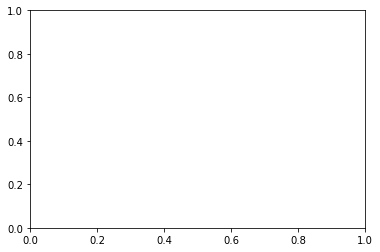

In [42]:
fig,ax = plt.subplots()
ax.hist(pddf['group_id'],pddf['count'])

In [30]:
pddf.head()

,date,group_id_first,count
0,2018-06-19,E,6
1,2018-06-19,Y,49
2,2018-06-19,C,21
3,2018-06-19,G,39
4,2018-06-19,H,20


In [ ]:
### group by company then run clustering to find inherent features of a companys patents, determine how similar another company is based on those features

In [3]:
import pandas as pd
train = pd.read_csv("data/temp/train_pd.csv",sep="|")
cols= ['Unnamed: 0.1','id','date','abstract','title']
train.drop(cols,axis=1,inplace=True)
train = train.fillna(0)
train = pd.get_dummies(train,drop_first=True)

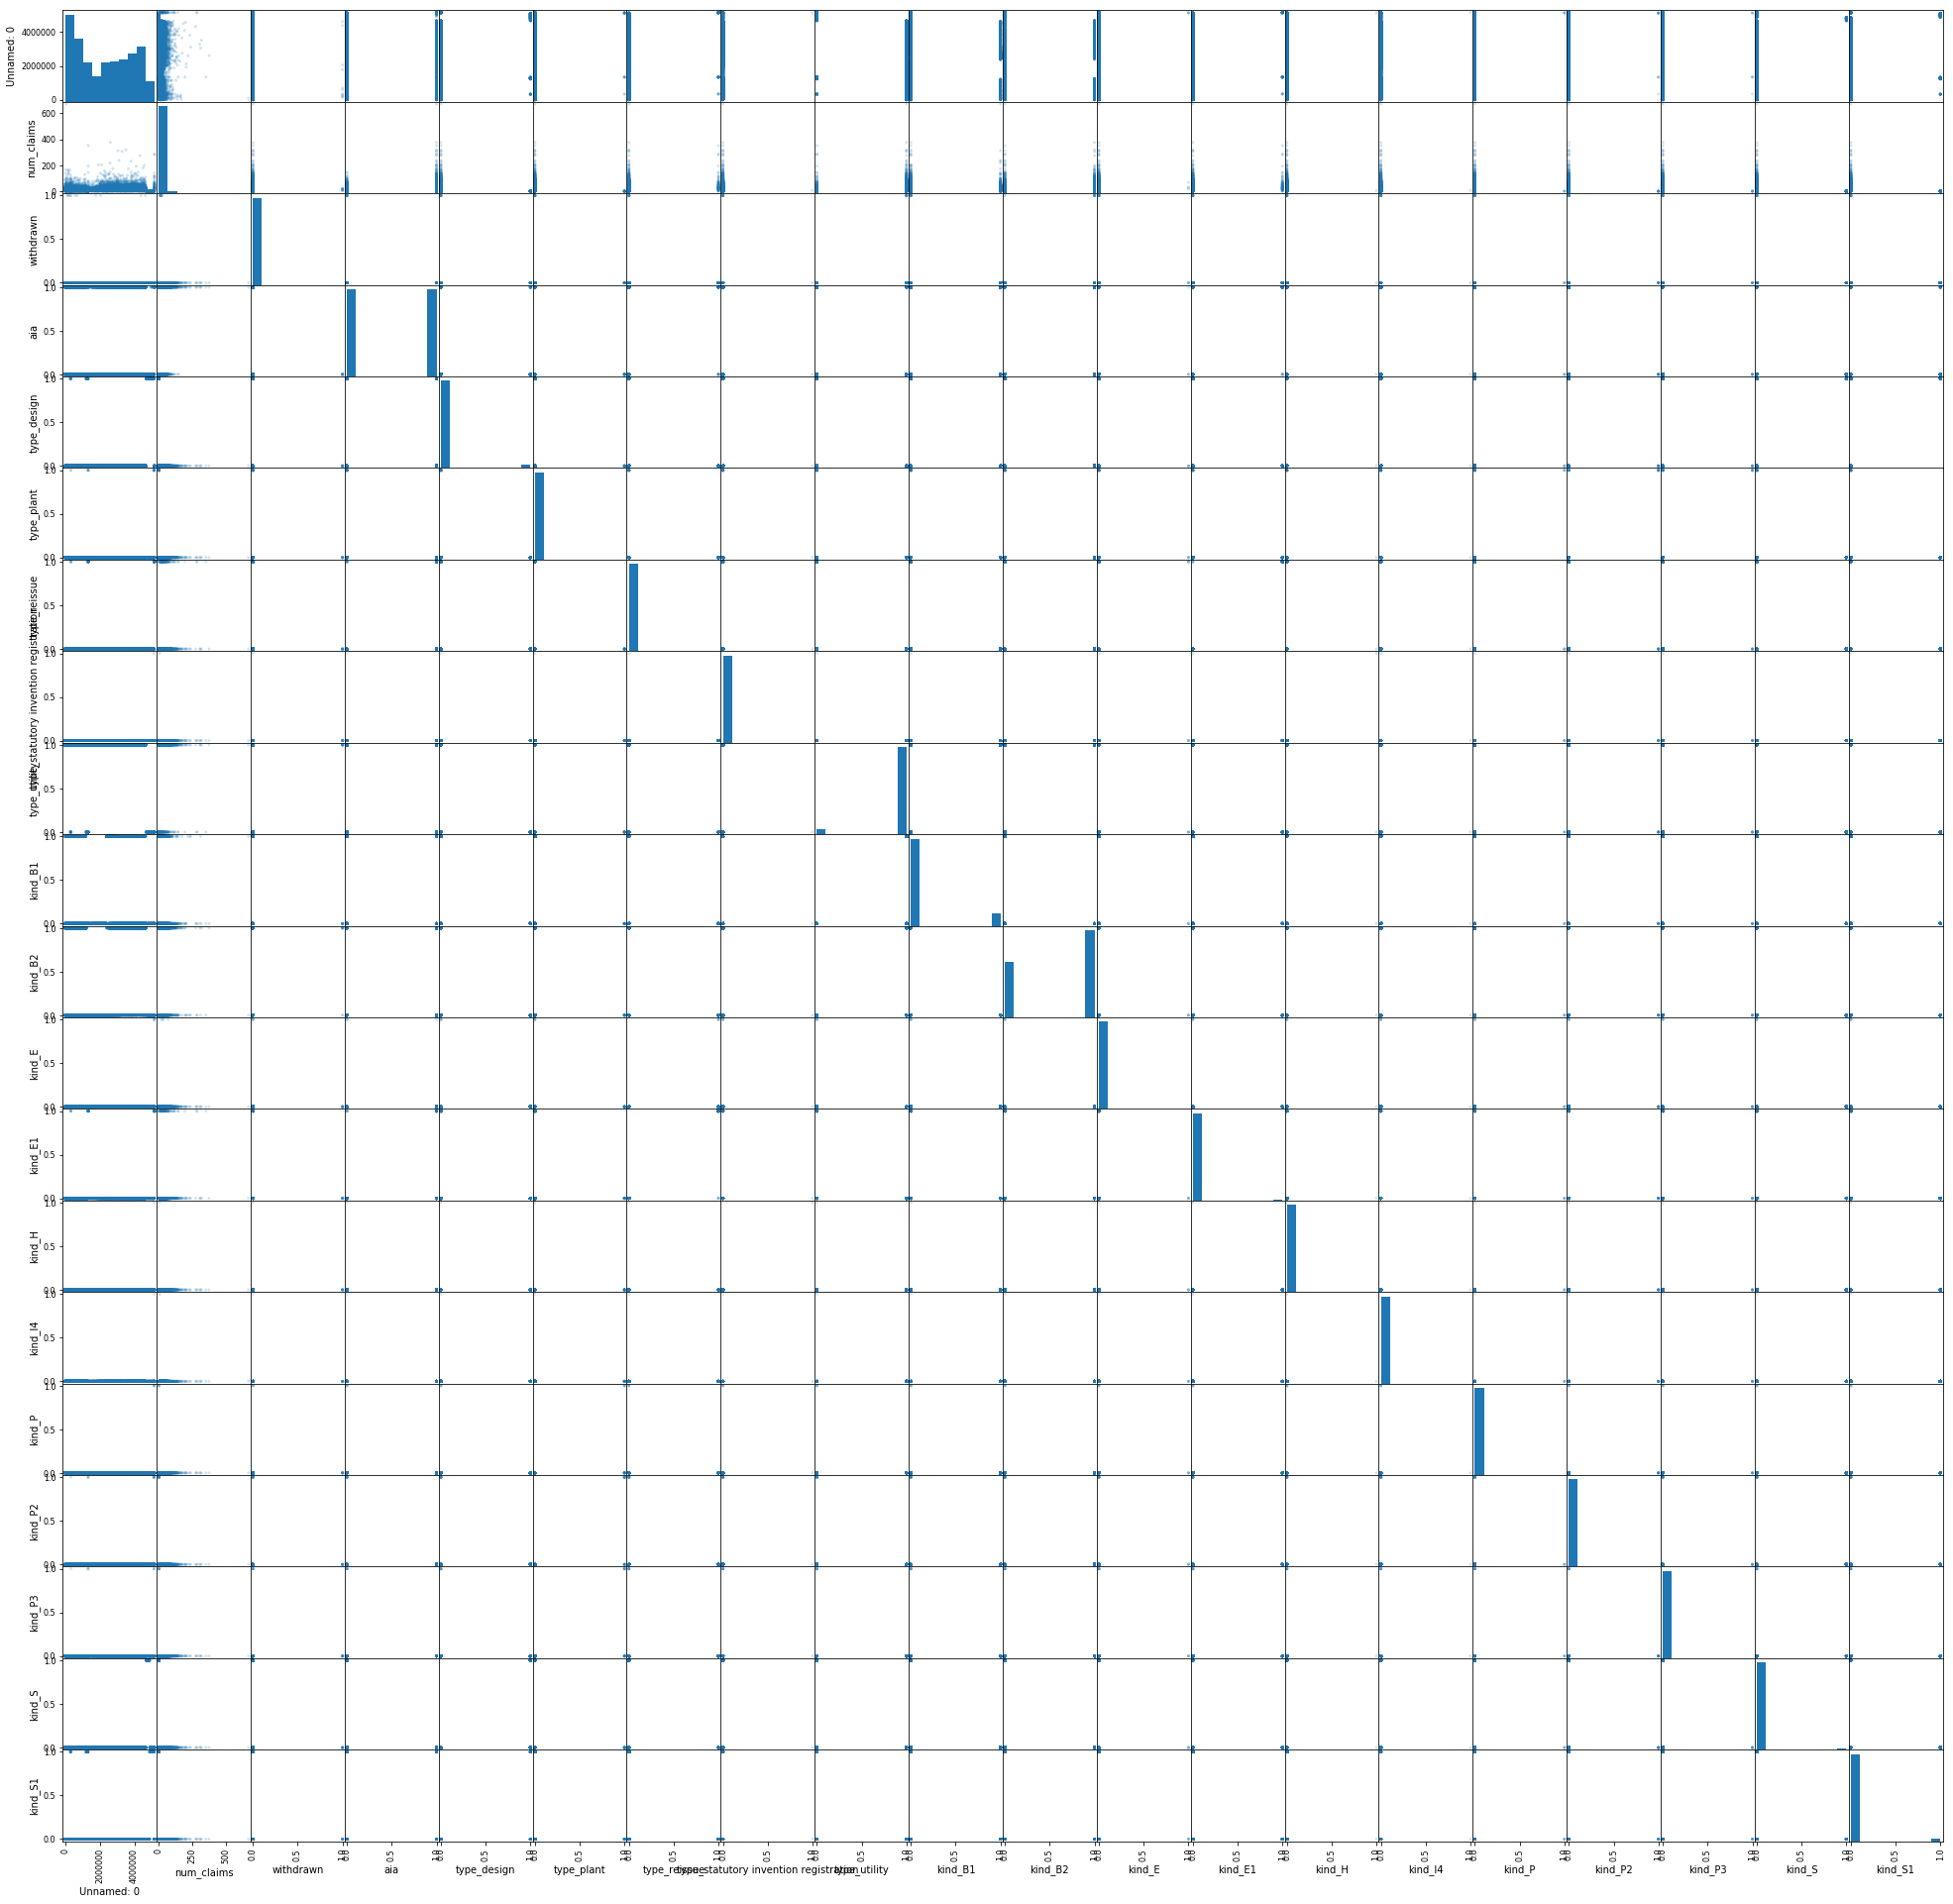

In [4]:
import matplotlib.pyplot as plt
pd.plotting.scatter_matrix(train, alpha=0.2, figsize=(34,34))
plt.show()